### Grades of Students - Project

**Problem Statement:**
    
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

**Columns Description    --  total 43 columns**

**Seat No : The enrolled number of candidate that took the exams**

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.

All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

### Predict - CGPA of a student based on different grades in four year.

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the dataset
grades = pd.read_csv('Grades.csv')
grades

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


#### Checking the shape of the dataset

In [3]:
grades.shape

(571, 43)

#### Checking the column name of the Dataset

In [4]:
grades.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

#### Checking the information of the dataset

In [5]:
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

#### Checking th enull values

In [6]:
grades.isnull()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
568,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
569,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
grades.isnull().sum().sort_values(ascending=False)

CS-406       85
CS-412       79
CS-423       14
CS-414       13
CS-419       13
CS-317       12
CS-421       12
CS-403       12
TC-383       10
EF-303       10
HS-304       10
CS-301       10
CS-302       10
CS-312       10
MT-442       10
MT-331        9
EL-332        9
CS-318        9
CS-306        9
EE-222        7
MT-224        7
CS-210        7
CS-212        6
CS-215        6
EE-217        6
CS-214        6
CS-203        5
CS-211        5
MT-222        5
HS-205/20     5
CS-107        2
ME-107        2
EE-119        2
EL-102        2
CS-106        2
MT-111        2
HS-105/12     1
CY-105        1
Seat No.      0
PH-121        0
CS-105        0
HS-101        0
CGPA          0
dtype: int64

In [8]:
# Checking unique values in the dataset
grades.nunique()

Seat No.     571
PH-121        13
HS-101        12
CY-105        13
HS-105/12     13
MT-111        13
CS-105        11
CS-106        13
EL-102        13
EE-119        12
ME-107        13
CS-107        14
HS-205/20     13
MT-222        14
EE-222        13
MT-224        14
CS-210        14
CS-211        14
CS-203        13
CS-214        13
EE-217        13
CS-212        12
CS-215        14
MT-331        12
EF-303        12
HS-304        14
CS-301        12
CS-302        11
TC-383        12
MT-442        12
EL-332        13
CS-318        14
CS-306        13
CS-312        14
CS-317        12
CS-403        11
CS-421        13
CS-406        14
CS-414        13
CS-419        12
CS-423        12
CS-412        13
CGPA         491
dtype: int64

In [9]:
# Dropping the column seat no as it will nit cintribute much to our Model Prediction
grades = grades.drop(['Seat No.'], axis=1)
grades.shape

(571, 42)

#### Data Visualization

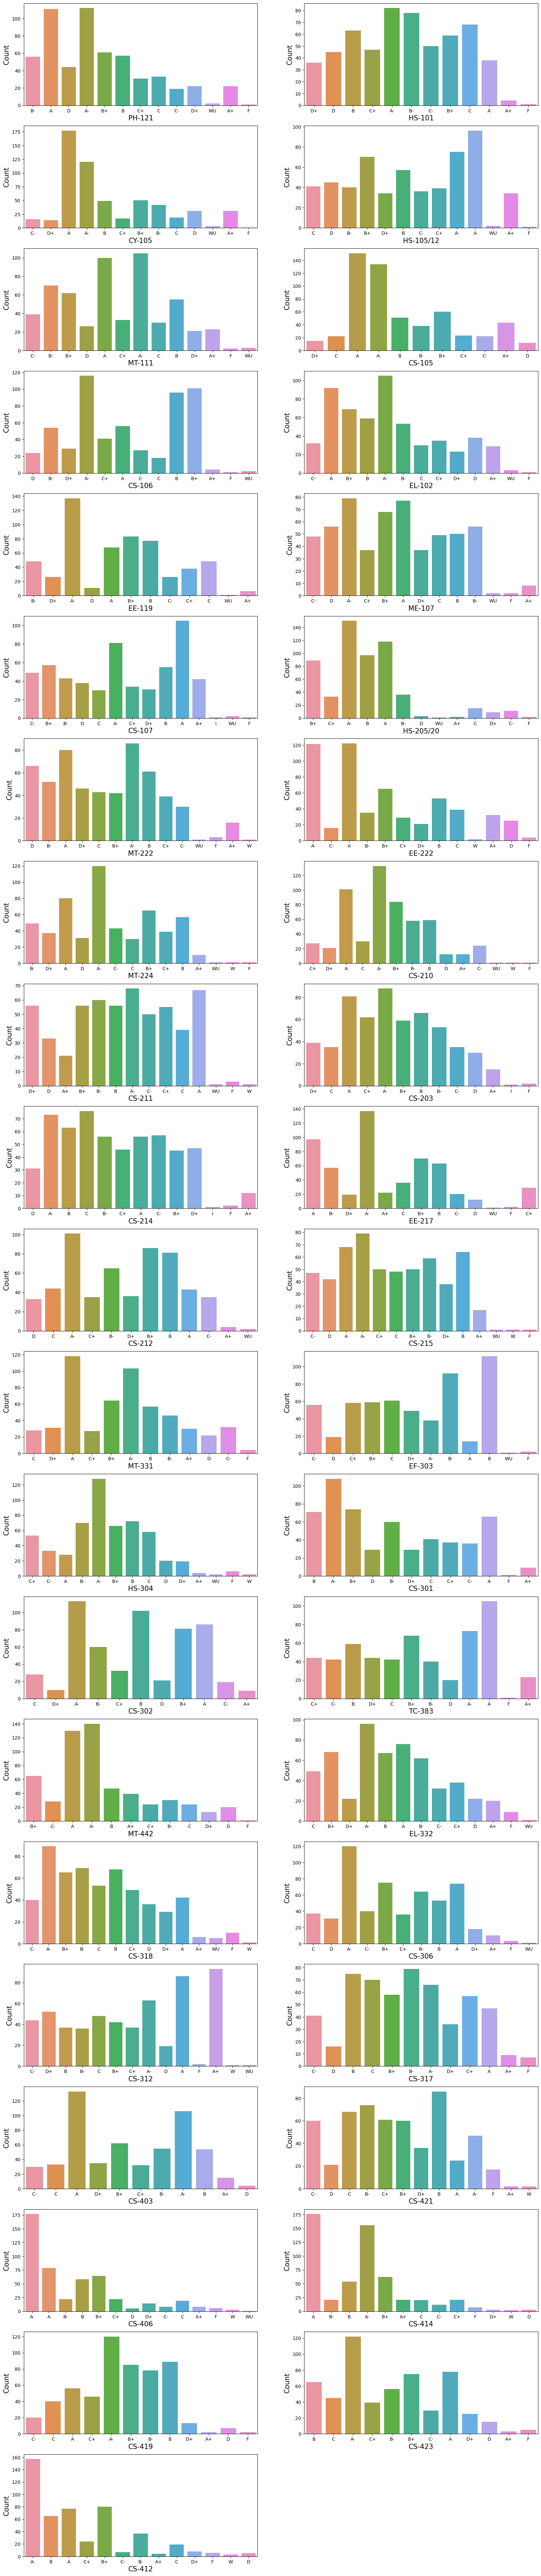

In [10]:
# Visualizing the dataset by countplot

plt.figure(figsize=(20,100))
sub = 1

for i in grades.columns[0:41]:
    if sub <=41:
        st = plt.subplot(21,2,sub)
        sns.countplot(data=grades,x=i)
        plt.xlabel(i,fontsize=15)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.ylabel('Count',fontsize=15)
    sub+=1
plt.show()

### Data Feature Selection and Engineering


In [11]:
grades.isnull().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [12]:
# Importing Simple Imputer to replace NaN values

from sklearn.impute import SimpleImputer

for i in grades.columns:
    SI = SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
    grades[i]=SI.fit_transform(grades[i].values.reshape(-1,1))[:,0]

In [13]:
grades.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [14]:
# Applying Label encoder to categorical columns for analysis 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in grades.columns:
    if(grades[i].dtypes=='object'):
        grades[i]=le.fit_transform(grades[i].values.reshape(-1,1))
grades

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,2,2,0,0,0,4,4,3,0,3.798
567,1,0,0,0,0,0,0,2,0,0,...,4,4,0,0,2,3,2,6,2,3.772
568,3,0,2,4,0,0,0,0,0,3,...,2,3,0,4,0,6,4,2,2,3.470
569,0,4,9,0,9,10,5,8,5,8,...,9,3,3,8,9,6,3,5,6,2.193


In [15]:
# Checking the dataset by describe function

grades.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.781086,5.071804,2.898424,4.241681,3.896673,2.838879,4.122592,3.959720,3.886165,4.779335,...,4.071804,4.835377,3.432574,5.385289,2.984238,2.397548,3.856392,3.966725,3.049037,2.954888
std,3.046895,2.785317,2.964737,3.200507,2.988546,2.696709,2.727192,3.031436,2.657528,3.146202,...,3.362345,2.740382,2.980685,2.729063,2.468346,2.499388,2.382769,2.795475,2.332316,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,0.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,3.000000,3.000000,5.000000,...,3.000000,5.000000,3.000000,5.000000,2.000000,2.000000,4.000000,4.000000,2.000000,3.029000
75%,6.000000,7.000000,4.500000,7.000000,6.000000,4.000000,5.000000,6.000000,6.000000,8.000000,...,7.000000,7.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,4.000000,3.451000
max,12.000000,11.000000,12.000000,12.000000,12.000000,10.000000,12.000000,12.000000,11.000000,12.000000,...,13.000000,11.000000,10.000000,12.000000,13.000000,12.000000,11.000000,11.000000,12.000000,3.985000


Analysis:
    
We can see the huge difference between 75% to max in our dataset but our dataset is 
categorical so we cannot remove outliers

In [16]:
# Checking Correlation

grades.corr()['CGPA'].sort_values()

CS-210      -0.761468
CS-317      -0.760792
CS-214      -0.733848
CS-215      -0.730460
MT-111      -0.730095
EL-332      -0.729609
CS-306      -0.708299
CS-302      -0.696112
MT-224      -0.692696
CS-301      -0.664117
PH-121      -0.663135
ME-107      -0.663023
CY-105      -0.658282
MT-222      -0.656320
EE-217      -0.655993
EE-119      -0.646829
CS-203      -0.644191
CS-212      -0.642878
EL-102      -0.642262
CS-419      -0.641804
CS-421      -0.633001
CS-211      -0.628070
CS-107      -0.615309
HS-105/12   -0.613989
CS-105      -0.613169
MT-442      -0.582592
EE-222      -0.575335
TC-383      -0.572329
CS-318      -0.566393
HS-304      -0.557912
CS-403      -0.544543
HS-101      -0.537170
CS-106      -0.534995
CS-423      -0.520968
MT-331      -0.508428
EF-303      -0.485478
CS-406      -0.474419
CS-412      -0.466512
HS-205/20   -0.460525
CS-312      -0.458019
CS-414      -0.384003
CGPA         1.000000
Name: CGPA, dtype: float64

<AxesSubplot:>

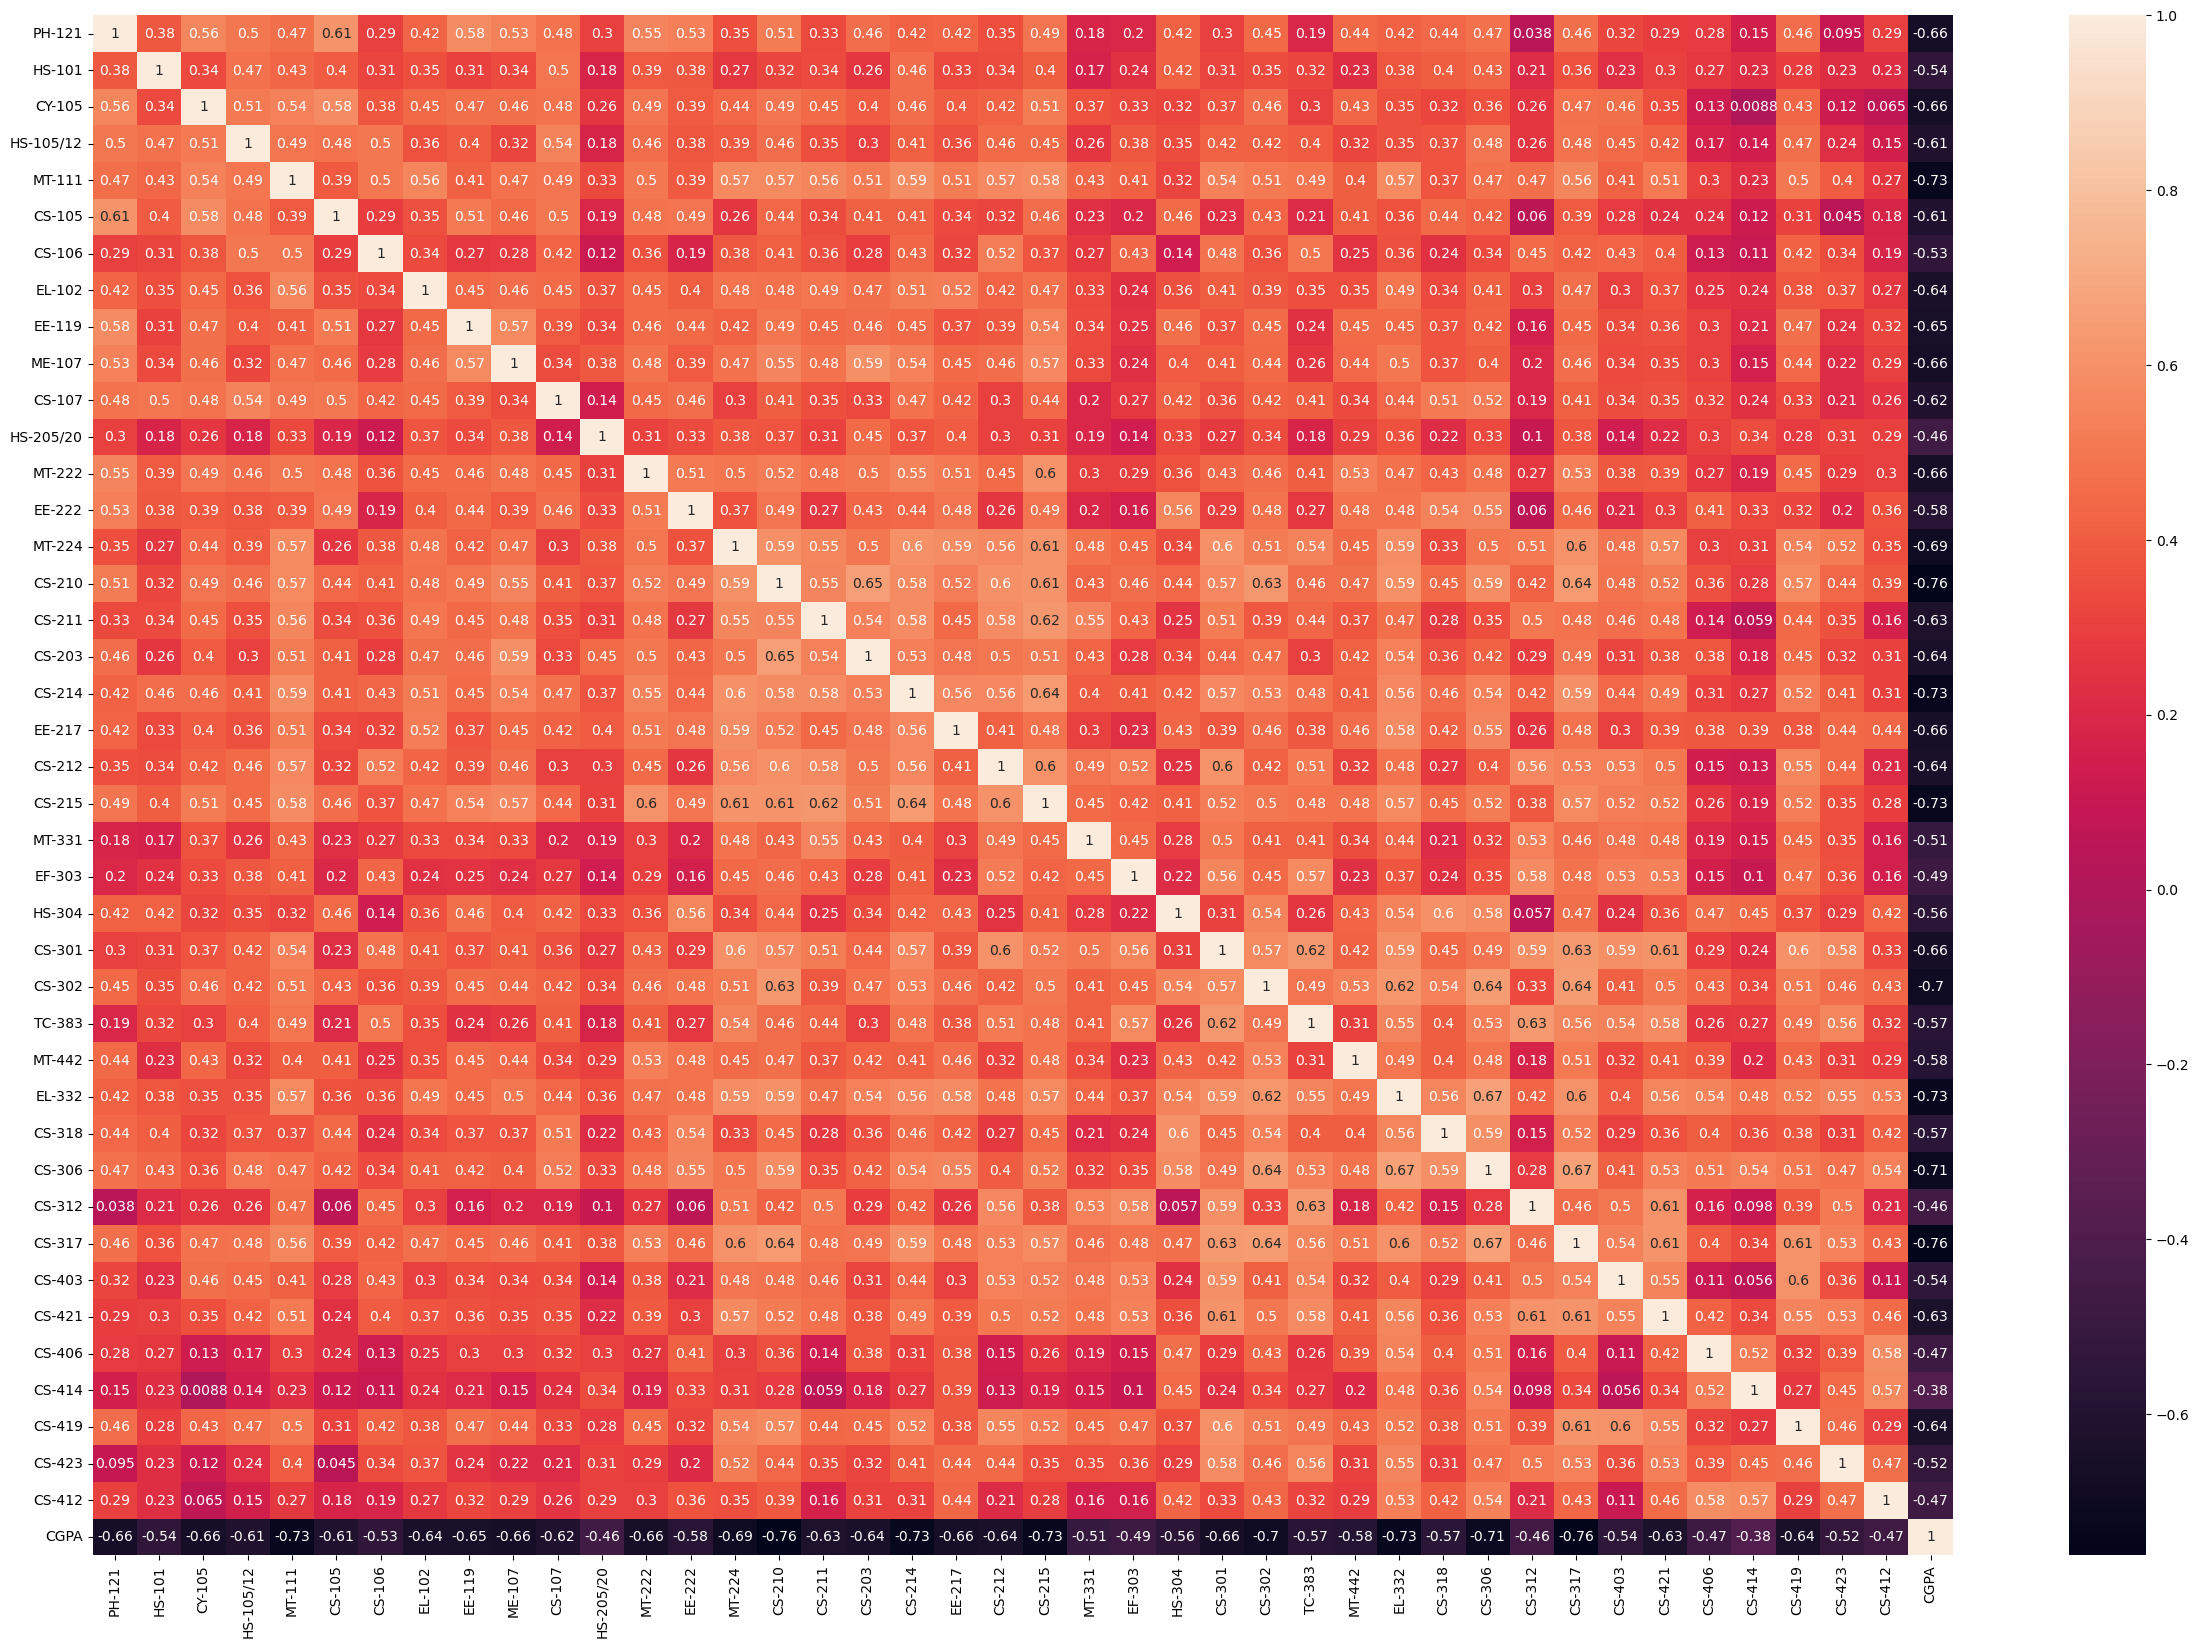

In [17]:
# Visualizing Correlation in heatmap

plt.figure(figsize=(30,20))
sns.heatmap(grades.corr(),annot=True)

In [18]:
# Checking skewness

grades.skew().sort_values()

CGPA        -0.497203
CS-214       0.013129
HS-101       0.053303
ME-107       0.108385
CS-211       0.116085
CS-317       0.140692
CS-215       0.163631
CS-421       0.179508
MT-222       0.193993
CS-203       0.274205
HS-105/12    0.324183
TC-383       0.331652
CS-318       0.356504
EF-303       0.383655
CS-107       0.414846
CS-212       0.414872
CS-301       0.415084
CS-306       0.424753
MT-224       0.430480
CS-312       0.442525
EL-332       0.459160
MT-111       0.484906
EL-102       0.501161
CS-419       0.506748
CS-423       0.526550
HS-304       0.544843
PH-121       0.549104
EE-119       0.574880
CS-302       0.601788
CS-403       0.618339
MT-331       0.627721
CS-106       0.639845
CS-210       0.723967
EE-217       0.724325
EE-222       0.759105
MT-442       0.869952
HS-205/20    0.897186
CS-105       0.930769
CY-105       0.982144
CS-414       1.292931
CS-412       1.329362
CS-406       1.522703
dtype: float64

In [19]:
grades.shape

(571, 42)

Analysis:
We have not removed outliers or performed transformation method, since our datset is categorical we should not perform these methods as it will affect the Model prediction.
Let's start creating Model

## Model Evaluation


In [20]:
x = grades.drop(['CGPA'], axis = 1)
y = grades['CGPA']

In [21]:
x.shape

(571, 41)

In [22]:
y.shape

(571,)

In [23]:
# Importing required Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=101)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
LR = LinearRegression()
RFR = RandomForestRegressor()
svr = SVR()
DTR = DecisionTreeRegressor()
GBR = GradientBoostingRegressor()
KNR = KNeighborsRegressor()
BR = BaggingRegressor()
SR = SGDRegressor()
ABR = AdaBoostRegressor()
ETR = AdaBoostRegressor()

Model = [LR,RFR,svr,DTR,GBR,KNR,BR,SR,ABR,ETR]

for m in Model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predmod = m.predict(x_test)
    score = r2_score(y_test,predmod)
    print("R2_score of", m,"is:",score*100)
    print("Mean absolute error: ", mean_absolute_error(y_test,predmod))
    print("Mean squared error: ", mean_squared_error(y_test,predmod))
    print("Root Mean absolute error: ",np.sqrt(mean_squared_error(y_test,predmod)))
    print('---------')

R2_score of LinearRegression() is: 93.60451147267949
Mean absolute error:  0.11544376478864178
Mean squared error:  0.0244119091940438
Root Mean absolute error:  0.1562431092689972
---------
R2_score of RandomForestRegressor() is: 95.79165753895917
Mean absolute error:  0.09564377906976726
Mean squared error:  0.01606345998081392
Root Mean absolute error:  0.1267417057673358
---------
R2_score of SVR() is: 95.49358244272048
Mean absolute error:  0.09641511107491162
Mean squared error:  0.017201227979505563
Root Mean absolute error:  0.13115345203045767
---------
R2_score of DecisionTreeRegressor() is: 74.45335490093429
Mean absolute error:  0.22401162790697676
Mean squared error:  0.09751286046511627
Root Mean absolute error:  0.31227049246625316
---------
R2_score of GradientBoostingRegressor() is: 96.63079747138512
Mean absolute error:  0.08480890197730666
Mean squared error:  0.012860419627607195
Root Mean absolute error:  0.11340379018184178
---------
R2_score of KNeighborsRegresso

In [26]:
from sklearn.model_selection import cross_val_score

cr1 = cross_val_score(LR,x,y, cv=10)
cr2 = cross_val_score(RFR,x,y, cv=10)
cr3 = cross_val_score(svr,x,y, cv=10)
cr4 = cross_val_score(DTR,x,y, cv=10)
cr5 = cross_val_score(GBR,x,y, cv=10)
cr6 = cross_val_score(KNR,x,y, cv=10)
cr7 = cross_val_score(BR,x,y, cv=10)
cr8 = cross_val_score(SR,x,y, cv=10)
cr9 = cross_val_score(ABR,x,y, cv=10)
cr10 = cross_val_score(ETR,x,y, cv=10)

print('CV score of Linear Regression:',cr1.mean()*100)
print('CV score of Random Forest Regressor:',cr2.mean()*100)
print('CV score of Support Vector Regressor:',cr3.mean()*100)
print('CV score of Decision Tree Regressor:',cr4.mean()*100)
print('CV score of Gradient Boost Regressor:',cr5.mean()*100)
print('CV score of K Neighbors Regressor:',cr6.mean()*100)
print('CV score of Bagging Regressor:',cr7.mean()*100)
print('CV score of SGDRegressor:',cr8.mean()*100)
print('CV score of AdaBoostRegressor:',cr9.mean()*100)
print('CV score of ExtraTrees Regressor:',cr10.mean()*100)

CV score of Linear Regression: 90.83070308162753
CV score of Random Forest Regressor: 91.47770677645882
CV score of Support Vector Regressor: 91.56204944681947
CV score of Decision Tree Regressor: 81.03293285525362
CV score of Gradient Boost Regressor: 92.94422706006458
CV score of K Neighbors Regressor: 89.99866716292627
CV score of Bagging Regressor: 89.71609843962631
CV score of SGDRegressor: 80.48078401146904
CV score of AdaBoostRegressor: 87.18824323404147
CV score of ExtraTrees Regressor: 86.76890263155336


# Final Model

# Random Forest Regressor

## Saving the model

In [27]:
# Saving the model using .pkl

import joblib
joblib.dump(RFR,'Grades_of_student_prediciton.pkl')

['Grades_of_student_prediciton.pkl']

## Model Prediction 

In [28]:
# Loading the saved model

Model=joblib.load('Grades_of_student_prediciton.pkl')

#Prediction

prediction = Model.predict(x_test)
pd.set_option('display.max_rows',None)
pd.DataFrame([Model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,1.94022,1.749
1,2.48677,2.388
2,3.72622,3.700
3,3.30336,3.443
4,2.11444,2.011
5,3.29803,3.334
6,2.96082,3.019
7,2.83629,3.019
8,2.15504,1.957
9,2.44154,2.559
